In [1]:
import numpy as np
import onecircuit
from onecircuit import *


In [2]:
num_qubits = 3
num_layers = 1
phase = [np.pi/6., np.pi/6., np.pi/6.]
time = 1.0
y = lamb2y(time,lamb = 0.1) #dephasing, convert lambda to gamma

prep = [stargraph, num_qubits, num_layers, []]
sens = [sensing_qc, num_qubits, time, phase]
nois = [dephasing_qc, num_qubits, time, y]
post = [stargraph_inv, num_qubits, num_layers, []]

circuit = [prep, sens, nois, post]

     ┌───────┐   ┌───────┐    ░ ┌────────────┐┌─────────────────┐ ░    »
q_0: ┤ Ry(1) ├─■─┤ Ry(1) ├─■──░─┤ sensing_qc ├┤ Quantum_channel ├─░──■─»
     ├───────┤ │ └───────┘ │  ░ ├────────────┤├─────────────────┤ ░  │ »
q_1: ┤ Ry(1) ├─■───────────┼──░─┤ sensing_qc ├┤ Quantum_channel ├─░──┼─»
     ├───────┤             │  ░ ├────────────┤├─────────────────┤ ░  │ »
q_2: ┤ Ry(1) ├─────────────■──░─┤ sensing_qc ├┤ Quantum_channel ├─░──■─»
     └───────┘                ░ └────────────┘└─────────────────┘ ░    »
«     ┌────────┐   ┌────────┐
«q_0: ┤ Ry(-1) ├─■─┤ Ry(-1) ├
«     └────────┘ │ ├────────┤
«q_1: ───────────■─┤ Ry(-1) ├
«     ┌────────┐   └────────┘
«q_2: ┤ Ry(-1) ├─────────────
«     └────────┘             
0 0.5402760855219262
5 0.49988513616107233
10 0.477871007831586
15 0.4625205817773272
20 0.4513047512700008
25 0.4432924453829057
30 0.4374499993439144
35 0.4321117750262451
40 0.4274085757767708
45 0.42364899427377767
50 0.42066092936134825
55 0.4175321569634781
60 0.4137539349

(0.0, 201.0)

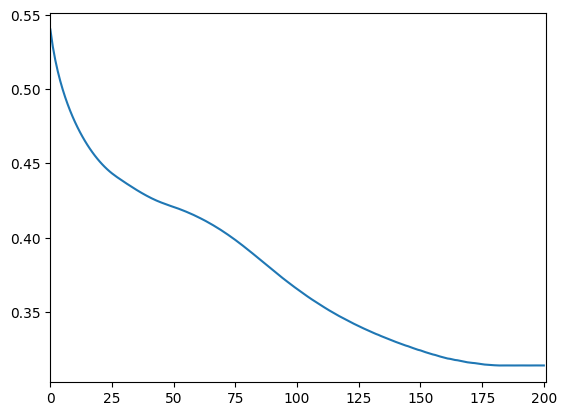

In [3]:
# training sld bound
import matplotlib.pyplot as plt
num_steps = 201

vqc = VariationalCircuit(circuit)
vqc.print()
circuit,costs = vqc.fit(num_steps, cost_func = sld_bound, train_opt = [0], method = 'two_point', learning_rate = 0.5)

vqc.save('save_pkl')
#plot
iterations = list(range(len(costs)))
plt.plot(iterations, np.real(costs), '-')
plt.xlim(0, num_steps)



In [4]:
import pickle

# Load data from a file using pickle
with open('save_pkl', 'rb') as file:
    loaded_circuit = pickle.load(file)

# cls bound and quantum bound
clasical_bound = cls_bound(loaded_circuit)
quantum_bound = sld_bound(loaded_circuit)

print(clasical_bound, quantum_bound)

3.1130105336583793 0.31389563559614736


In [5]:
print(vqc.u0.func)

<function stargraph at 0x10ac6f250>
